# Análisis de secuencias de splice sites en homo sapiens con K-Means


### Índice de Apartados

1. [Algoritmo k-NN](#Algoritmo-k-NN)
2. [Codificación One-Hot](#Codificación-One-Hot)
3. [Clasificador k-NN](#Clasificador-k-NN)
4. [Representación de Secuencias Logo](#Representación-de-Secuencias-Logo)

---



## Algoritmo k-NN

El algoritmo de k vecinos más cercanos, también conocido como KNN o k-NN, es un clasificador de aprendizaje supervisado no paramétrico, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individual. Si bien se puede usar para problemas de regresión o clasificación, generalmente se usa como un algoritmo de clasificación, partiendo de la suposición de que se pueden encontrar puntos similares cerca uno del otro.


### Características

1. **No paramétrico**: KNN es un algoritmo no paramétrico, lo que significa que no hace suposiciones explícitas sobre la forma funcional de los datos, lo que lo hace útil en situaciones donde la estructura de los datos es desconocida.

2. **Basado en instancias**: A diferencia de otros algoritmos que requieren un modelo de entrenamiento, KNN actúa directamente sobre el conjunto de datos de entrenamiento para realizar predicciones. Esto significa que el conjunto de datos de entrenamiento efectivamente se convierte en el "modelo".

3. **Perezoso**: KNN es considerado un algoritmo de aprendizaje perezoso porque no aprende una función discriminativa del conjunto de entrenamiento sino que memoriza el conjunto de entrenamiento. La computación se pospone hasta el momento de la clasificación.

4. **Sensibilidad a la escala de características**: KNN depende de la distancia entre los puntos de datos para determinar su vecindad. Por lo tanto, es crucial que todas las características se midan en la misma escala; de lo contrario, las características con escalas mayores dominarán el cálculo de la distancia.

5. **Selección de `k`**: La elección del número `k` de vecinos tiene un impacto significativo en el rendimiento del algoritmo. Un valor de `k` pequeño puede hacer que el algoritmo sea sensible al ruido de los datos, mientras que un valor de `k` grande puede hacerlo insensible a las estructuras subyacentes de los datos.

6. **Distancias**: Se pueden utilizar diversas métricas de distancia (como la distancia euclidiana, manhattan, o minkowski) para calcular la "cercanía" entre puntos de datos. La elección de la métrica puede influir en la precisión del algoritmo.

7. **Aplicabilidad**: KNN ha sido aplicado exitosamente en una amplia gama de problemas, desde la recomendación de productos hasta la clasificación de imágenes y la detección de anomalías.


### Fortalezas y Debilidades

| Fortalezas                  | Debilidades                  |
|-----------------------------|------------------------------|
| Simple de entender e implementar. | Alta demanda computacional con grandes conjuntos de datos. |
| Flexible a la funcionalidad de la distancia | Requiere un alto costo computacional durante la fase de test |
| No requiere un modelo subyacente, lo que lo hace muy flexible. | Necesita una métrica de distancia adecuada. |
| Funciona bien con un número pequeño de dimensiones. | Sensible a la escala de los datos y a los datos irrelevantes o redundantes. |
| Pocos hiperparámetros: KNN solo requiere un valor k y una métrica de distancia, que es baja en comparación con otros algoritmos de machine learning. | Requiere una cuidadosa selección del parámetro k. |



In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seqlogo

## Codificación One-Hot

In [2]:
df = pd.read_csv('splice.csv')
df.head()

,y,Pos.1,Pos.2,Pos.3,Pos.4,Pos.5,Pos.6,Pos.7
0,1,g,a,g,g,a,g,a
1,1,g,a,g,a,g,g,a
2,1,a,a,a,g,a,g,t
3,1,c,a,g,g,g,g,c
4,1,c,a,g,g,g,g,g


In [3]:
def one_hot_encode(sequence):
    """
    Transforma una secuencia de nucleótidos en una representación one-hot.
    
    Args:
    sequence (str): Una cadena que representa la secuencia de nucleótidos (e.g., "GAGGAGA").
    
    Returns:
    list: Una lista que representa la secuencia en formato one-hot encoding.
    """
    # Diccionario para mapear cada nucleótido a su representación one-hot
    nucleotide_to_one_hot = {
        'A': [1, 0, 0, 0],
        'C': [0, 1, 0, 0],
        'G': [0, 0, 1, 0],
        'T': [0, 0, 0, 1]
    }
    
    # Inicializa una lista vacía para almacenar la secuencia one-hot
    one_hot_sequence = []
    
    # Itera sobre cada nucleótido de la secuencia y lo convierte a one-hot
    for nucleotide in sequence.upper():  # Convertir a mayúsculas para manejar minúsculas
        one_hot_sequence.extend(nucleotide_to_one_hot[nucleotide])
    
    return one_hot_sequence

In [4]:
# Ejemplo de uso de la función
sequence = "GAGGAGA"
one_hot_encoded_sequence = one_hot_encode(sequence)
print(one_hot_encoded_sequence)

[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]


In [5]:
#onehot_df = pd.read_csv('splice_onehot.csv')
#onehot_df.head()

## Clasificador-k-NN

Desarrollar un script en R (o Python) que implemente un clasificador knn. El script ha de realizar los
siguientes apartados:

- (a) Leer los datos del fichero splice.csv e indicar el número de observaciones por clase.

- (b) Transformar las secuencias de nucle tidos en vectores num ricos usando la función de transformaci n
desarrollada anteriormente. En caso que no se haya implementado la función de codificación
one-hot, se puede acceder a los datos ya transformados cargando el fichero splice_onehot.csv.
- (c) Utilizando la semilla aleatoria 123, separar los datos en dos partes, una parte para training (67%)
y una parte para test (33%).
- (d) Aplicar el knn (k = 1, 5, 11, 21, 51, 71) basado en el training para predecir que secuencias del test
son secuencias “splice site” o no. Además, realizar una curva ROC para cada k y mostrar el valor
de AUC.
- (e) Comentar los resultados de la clasificación en función de la curva ROC, valor de AUC y del número
de falsos positivos, falsos negativos y error de clasificación obtenidos para los diferentes valores de
k. La clase asignada como positiva son las representan secuencias “splice sites”.

In [6]:
# a) Leer los datos y mostrar el número de observaciones por clase
df = pd.read_csv('splice.csv')
print(df['y'].value_counts())

1    200
0    200
Name: y, dtype: int64


In [7]:
# b) Transformar las secuencias a vectores numéricos usando one-hot encoding
df['one_hot'] = df.apply(lambda row: one_hot_encode(row['Pos.1']+row['Pos.2']+row['Pos.3']+row['Pos.4']+row['Pos.5']+row['Pos.6']+row['Pos.7']), axis=1)
X = np.array(df['one_hot'].tolist())
y = df['y'].values

In [8]:
# c) Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

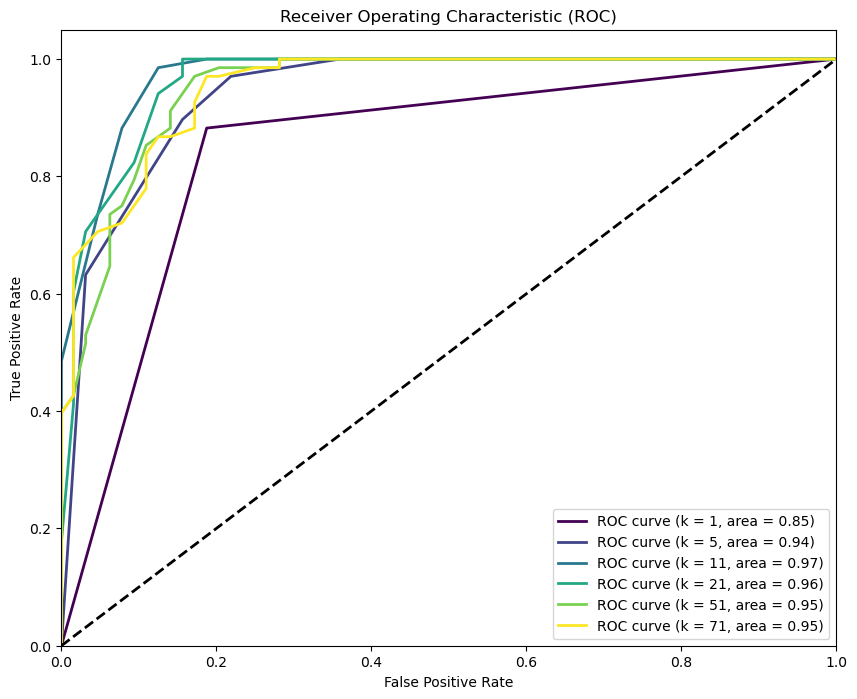

,k,FP,FN,Error Rate
0,1,12,8,0.15
1,5,14,2,0.12
2,11,14,0,0.11
3,21,19,0,0.14
4,51,20,0,0.15
5,71,21,0,0.16


In [9]:
ks = [1, 5, 11, 21, 51, 71]
# Inicializar la figura fuera del bucle para ROC curves
plt.figure(figsize=(10, 8))

# Generar colores automáticamente
colors = plt.cm.viridis(np.linspace(0, 1, len(ks)))

# Preparar una tabla para almacenar resultados y otra para FP, FN, y errores de clasificación
results = []
results_table = []

for k, color in zip(ks, colors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_score = knn.predict_proba(X_test)[:, 1]
    y_pred = knn.predict(X_test)
    
    # Añadir las predicciones al DataFrame de resultados
    results.append(y_pred)
    
    # Calcular curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Graficar Curva ROC en la misma figura
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve (k = %d, area = %0.2f)' % (k, roc_auc))
    
    # Calcular FP, FN, y errores de clasificación
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    error_rate = (fp + fn) / (fp + fn + tp + tn)
    error_rate = round(error_rate, 2)
    
    # Añadir los resultados a la tabla
    results_table.append({'k': k, 'FP': fp, 'FN': fn, 'Error Rate': error_rate})

# Configuración de la gráfica
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Mostrar la tabla de resultados
results_df = pd.DataFrame(results_table)
results_df

Finalmente imprimimos los resultados, 1 los clasificados como "splice site" para cada valor de *k* y un breve resumen estadístico de los resultados obtenidos

In [10]:
results_df = pd.DataFrame(results, index=ks).T

# Nombrar las columnas como los valores de k
results_df.columns = [f'k={k}' for k in ks]
print("Tabla de Predicciones:")
results_df

Tabla de Predicciones:


,k=1,k=5,k=11,k=21,k=51,k=71
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,0,0,0,0,0,0
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
127,1,1,1,1,1,1
128,1,1,1,1,1,1
129,1,1,1,1,1,1
130,1,1,1,1,1,1


In [11]:
# Resumen estadístico
summary = results_df.apply(pd.value_counts).fillna(0).astype(int)
print("\nResumen Estadístico - Total clasificado como 'splice site':")
total_sequences = len(results_df)
for k in ks:
    splice_sites = summary.loc[1, f'k={k}']
    percentage = (splice_sites / total_sequences) * 100
    print(f"k={k}: {splice_sites} secuencias, {percentage:.2f}% del total")


Resumen Estadístico - Total clasificado como 'splice site':
k=1: 72 secuencias, 54.55% del total
k=5: 80 secuencias, 60.61% del total
k=11: 82 secuencias, 62.12% del total
k=21: 87 secuencias, 65.91% del total
k=51: 88 secuencias, 66.67% del total
k=71: 89 secuencias, 67.42% del total


Los resultados obtenidos del clasificador k-NN para diferentes valores de \(k\) revelan información sobre el equilibrio entre la capacidad del modelo para identificar correctamente las secuencias "splice site" (sensibilidad) y su habilidad para descartar secuencias que no son "splice site" (especificidad). A continuación, se comenta el rendimiento del clasificador basándose en la curva ROC, el valor de AUC, y el número de falsos positivos, falsos negativos y el error de clasificación para los diferentes valores de \(k\).

- **k = 1:** Este modelo muestra un buen equilibrio general con un área bajo la curva ROC de 0.85, indicando un buen rendimiento. Sin embargo, tiene un número relativamente más alto de falsos positivos y falsos negativos en comparación con otros valores de \(k\), lo que resulta en un error de clasificación del 15%. La sensibilidad es alta, pero a costa de una especificidad menor debido al número de falsos positivos.

- **k = 5:** La mejora en el área bajo la curva ROC a 0.94 sugiere una mejor distinción entre las clases. A pesar de un ligero aumento en falsos positivos en comparación con \(k=1\), el número drásticamente reducido de falsos negativos y el error de clasificación más bajo del 12% indican un modelo más robusto, especialmente en identificar correctamente las secuencias "splice site".

- **k = 11:** Este modelo logra eliminar completamente los falsos negativos, indicando una sensibilidad perfecta. Aunque los falsos positivos se mantienen igual que en \(k=5\), el área bajo la curva ROC aumenta a 0.97, y el error de clasificación disminuye ligeramente a 11%, lo que lo hace el mejor modelo hasta ahora en términos de equilibrio general.

- **k = 21, 51, 71:** Con estos valores de \(k\), observamos un patrón interesante: la cantidad de falsos positivos aumenta progresivamente, mientras que los falsos negativos se mantienen en cero, indicando que el modelo se vuelve cada vez menos específico pero mantiene su sensibilidad perfecta. El área bajo la curva ROC se mantiene alta (>0.95), sugiriendo un buen rendimiento general del modelo. Sin embargo, el error de clasificación aumenta ligeramente con valores de \(k\) más altos, reflejando el aumento en los falsos positivos.

**Conclusión:** En términos de balance entre sensibilidad y especificidad, el modelo con \(k=11\) parece ofrecer el mejor rendimiento, maximizando la sensibilidad (cero falsos negativos) mientras mantiene un control sobre los falsos positivos y minimizando el error de clasificación. Aunque modelos con valores más altos de \(k\) (21, 51, 71) mantienen la sensibilidad perfecta y presentan áreas bajo la curva ROC comparables, el incremento en falsos positivos y el error de clasificación sugiere un detrimento en la especificidad. Por lo tanto, un valor de \(k=11\) parece ser el más adecuado para este conjunto de datos y el objetivo de identificar secuencias "splice site" con alta precisión.

## Representación-de-Secuencias-Logo

Representamos las secuencias logo de cada tipo de secuencia (“splice site”/“non splice site”)

In [12]:
splice_site_sequences = df[df.y == 1]
non_splice_site_sequences = df[df.y == 0]
splice_site_sequences.head()

,y,Pos.1,Pos.2,Pos.3,Pos.4,Pos.5,Pos.6,Pos.7,one_hot
0,1,g,a,g,g,a,g,a,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
1,1,g,a,g,a,g,g,a,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ..."
2,1,a,a,a,g,a,g,t,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."
3,1,c,a,g,g,g,g,c,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
4,1,c,a,g,g,g,g,g,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."


In [13]:
def generate_logo(df):
    """
    Genera un logotipo de secuencia (sequence logo) a partir de un DataFrame que contiene secuencias biológicas.
    
    Un logotipo de secuencia es una representación gráfica de las frecuencias relativas de cada nucleótido
    o aminoácido en una alineación de secuencias. Esta función simplifica el DataFrame al eliminar una columna
    específica, calcula la matriz de frecuencia de posición (Position Frequency Matrix, PFM), la convierte en una
    matriz de peso de posición (Position Weight Matrix, PWM), y finalmente genera el logotipo de secuencia.

    Args:
    - df (pandas.DataFrame): DataFrame que contiene las secuencias biológicas. Se espera que tenga columnas para 
      posiciones específicas nombradas como 'Pos.1', 'Pos.2', ..., 'Pos.7', y una columna 'one_hot' que no se utiliza
      para generar el logotipo.

    Returns:
    - Una imagen en formato PNG del logotipo de secuencia generado. La imagen se devuelve en el formato especificado
      por la biblioteca `seqlogo`, utilizada internamente para generar el logotipo.
    ```
    """
    # Crear DataFrame simplificado sin la columna 'one_hot'
    df_simplified = df[['Pos.1', 'Pos.2', 'Pos.3', 'Pos.4', 'Pos.5', 'Pos.6', 'Pos.7']].applymap(lambda x: x.upper())

    # Contar la frecuencia de las letras por posición y transponer el resultado para tener una fila por posición
    pfm = df_simplified.apply(lambda col: col.value_counts()).fillna(0).astype(int).reindex(['A', 'C', 'G', 'T'], fill_value=0).transpose()

    # Convertir a Position Weight Matrix (PWM)
    ppm = seqlogo.pfm2ppm(pfm)
    ppm = seqlogo.Ppm(ppm)

    return seqlogo.seqlogo(ppm, ic_scale = False, format = 'png', size = 'medium')

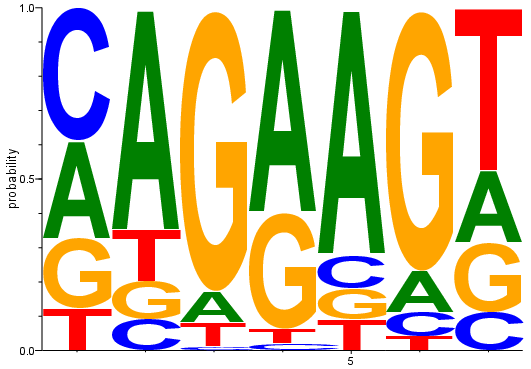

In [14]:
generate_logo(splice_site_sequences)

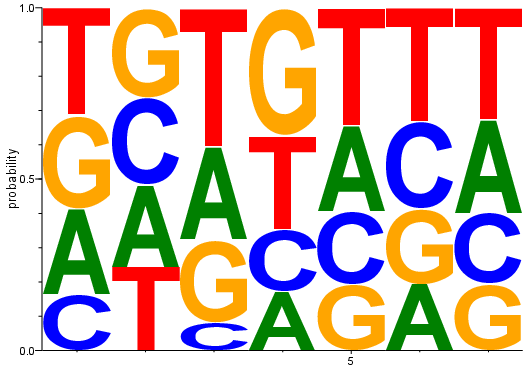

In [15]:
generate_logo(non_splice_site_sequences)

Un logotipo de secuencia es una representación gráfica que muestra la diversidad de secuencias en un alineamiento de secuencias biológicas, típicamente ADN, ARN, o secuencias de proteínas. Analizaremos varios aspectos de ellos:

- **Conservación**: Las posiciones con un símbolo dominante grande indican una alta conservación; es decir, un nucleótido específico aparece en esa posición en la mayoría de las secuencias. Esto puede sugerir una función biológica importante para esa posición en la secuencia.
En el caso del "Splice Site" vemos que las bases mejor consevadas son la G que se encuentra entre dos A mientras que en el "non splice site" destaca la T, seguida de otras T y con base G intercalada

- **Variabilidad**: Las posiciones con varios símbolos de tamaño más pequeño indican variabilidad; distintos nucleótidos aparecen en esa posición a través de las secuencias analizadas. Esto puede sugerir una tolerancia a mutaciones en esa posición o la inclusión de diferentes subtipos en el conjunto de datos. 
En ambos casos encontramos mayor variabilidad en la parte inferior de la imagen

- **Patrones de Secuencia**: Los logotipos de secuencia pueden ayudar a identificar patrones conservados que son críticos para la función biológica de las secuencias, como sitios de unión a proteínas o marcos de lectura abiertos. En el apartado conservación se ha mencionado los más relevantes

## Referencias

1. [¿Qué es el algoritmo de k vecinos más cercanos?- IBM](https://www.ibm.com/es-es/topics/knn) 
2. [k vecinos más próximos - Wikipedia](https://es.wikipedia.org/wiki/K_vecinos_m%C3%A1s_pr%C3%B3ximos)
3. [Sequence Logo - Wikipedia](https://en.wikipedia.org/wiki/Sequence_logo)
4. [Sequence Logo - Documentación](https://pypi.org/project/seqlogo/)